In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use("ggplot")

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
homedepot = pd.read_csv(r'...\product_descriptions.csv')
homedepot.shape

(124428, 2)

In [3]:
homedepot = homedepot.dropna()
print(homedepot.shape)
homedepot.head()

(124428, 2)


,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [4]:
product_descriptions1 = homedepot.head(1000)
product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<1000x13688 sparse matrix of type '<class 'numpy.float64'>'
	with 70783 stored elements in Compressed Sparse Row format>

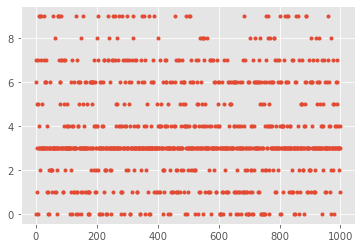

In [6]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [7]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind]),
    print

In [8]:
true_k = 50

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 cooking
 oven
 cu
 cooktop
 microwave
 burner
 touch
 options
 ft
 dishes
 cook
 delivery
 range
 levels
 large
 controls
 baking
 foods
 services
 convection
Cluster 1:
 tool
 speed
 pockets
 life
 free
 ridgid
 motor
 cutting
 grinder
 husky
 amp
 wrench
 handle
 loop
 grip
 power
 job
 polisher
 service
 trigger
Cluster 2:
 air
 cooling
 cool
 conditioner
 unit
 room
 control
 temperature
 fan
 timer
 power
 window
 btu
 cooler
 000
 deflection
 speeds
 way
 sq
 remote
Cluster 3:
 shelves
 storage
 shelf
 adjustable
 lbs
 cabinet
 shelving
 unit
 laminate
 easy
 finish
 capacity
 solid
 room
 closetmaid
 surface
 weight
 door
 white
 offers
Cluster 4:
 toilet
 flush
 bowl
 water
 flushing
 seat
 tank
 gpf
 toilets
 piece
 28
 round
 wax
 gal
 elongated
 performance
 height
 efficiency
 ring
 china
Cluster 5:
 bamboo
 shades
 natural
 window
 room
 blind
 panel
 outside
 fencing
 black
 size
 sturdy
 divider
 piece
 desk
 panels
 privacy
 mount
 add

In [9]:
lst = []
for i in range(true_k):
    for ind in order_centroids[i, :20]:
        lst.append(terms[ind])

cluster = []

for i in range(0,len(lst),20):
    cluster.append(lst[i:i+20])
df = pd.DataFrame(cluster[0])

for i in range (1,20):
    df[i] = cluster[i]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,cooking,tool,air,shelves,toilet,bamboo,metal,lithium,vinyl,door,dog,everbilt,nickel,tape,azek,window,landscape,patio,rug,snow
1,oven,speed,cooling,storage,flush,shades,drill,ion,flooring,doors,painted,informationmade,brushed,blanket,various,screen,stakes,chairs,vary,ariens
2,cu,pockets,cool,shelf,bowl,natural,screw,volt,installation,wood,casing,corner,finish,heater,screws,frame,edging,frame,slightly,chute
3,cooktop,life,conditioner,adjustable,water,window,steel,battery,gripstrip,steel,house,door,light,water,project,vinyl,downspout,dining,dimensions,clearing
4,microwave,free,unit,lbs,flushing,room,bit,drill,real,glass,stained,pin,hampton,insulation,trim,main,tree,cushions,rugs,solar
5,burner,ridgid,room,cabinet,seat,blind,screws,batteries,tile,energy,decorative,proposition,bay,scotch,cortex,welded,used,wicker,patterns,blower
6,touch,motor,control,shelving,tank,panel,plated,torque,floor,sliding,proposition,nbsp,sconce,denim,corrosion,spline,paver,outdoor,colors,sno
7,options,cutting,temperature,unit,gpf,outside,use,cordless,12,slab,nbsp,residents,bulb,masking,nails,film,pavers,fabric,published,start
8,ft,grinder,fan,laminate,toilets,fencing,hex,18,stone,frame,residents,finishscrews,included,fiberglass,projects,tape,ft,collection,exact,delivery
9,dishes,husky,timer,easy,piece,black,point,20,natural,patio,california,california,watt,backed,angles,aluminum,proflex,furniture,exists,engine


In [10]:
df.to_csv(r'C:\Users\Janna\Desktop\NorthWestern\Janna\Summer 2021\MSDS 434\Final Project\New.csv', index = False)

In [11]:
def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print_cluster(prediction[0])

In [12]:
show_recommendations("cutting tool")

Cluster 1:
 tool
 speed
 pockets
 life
 free
 ridgid
 motor
 cutting
 grinder
 husky
 amp
 wrench
 handle
 loop
 grip
 power
 job
 polisher
 service
 trigger


In [13]:
show_recommendations("spray paint")

Cluster 25:
 spray
 nozzle
 watering
 handle
 metal
 trigger
 psi
 easy
 water
 hose
 features
 cleaning
 pressure
 tank
 adjustment
 ryobi
 fitting
 washer
 pump
 grip


In [14]:
show_recommendations("water")

Cluster 28:
 water
 heater
 valve
 nox
 hot
 tank
 easy
 handle
 air
 gas
 use
 confirm
 pressure
 year
 gal
 management
 warranty
 requirements
 low
 temperature
